# Sachin Tendulkar ODI

## Import libraries

In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Acquistion

data link = https://raw.githubusercontent.com/Pranjulcr7/Sachin_Tendulkar_ODI_EDA/master/tendulkar_ODI.csv

In [330]:
df = pd.read_csv('tendulkar_ODI.csv')
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,01-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,06-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


## Data cleaning

In [331]:
#dropping column 'Unnamed: 0' 
df = df.drop(df.columns[0], axis=1)

#Converting date to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

# removing prefix  'v', stands for versus, from opposition column
df.Opposition = df.Opposition.apply( lambda x: x[2:])

#Removing rows with '-' value, DNB( did not bat)
df = df[df['4s'] != '-']

#Removing rows with '*' i.e. not out
df['Runs'] = df['Runs'].apply( lambda x: x[:-1] if '*' in x else x)

df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,0,-,2,0,0,0,5,caught,2,Pakistan,Gujranwala,1989-12-18
1,0,2,2,0,0,0,5,caught,2,New Zealand,Dunedin,1990-03-01
2,36,51,39,5,0,92.3,6,caught,1,New Zealand,Wellington,1990-03-06
3,19,38,35,1,1,54.28,4,bowled,2,England,Leeds,1990-07-18
4,31,31,26,3,0,119.23,6,bowled,2,England,Nottingham,1990-07-20


In [332]:
df['Mins'] = df['Mins'].apply(lambda x: 0 if x=='-' else x)
df.shape

(292, 12)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 294
Data columns (total 12 columns):
Runs          292 non-null object
Mins          292 non-null object
BF            292 non-null object
4s            292 non-null object
6s            292 non-null object
SR            292 non-null object
Pos           292 non-null object
Dismissal     292 non-null object
Inns          292 non-null object
Opposition    292 non-null object
Ground        292 non-null object
Start Date    292 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(11)
memory usage: 29.7+ KB


In [334]:
#converting columns to numeric data type
df.Runs = df.Runs.apply(pd.to_numeric)
df['4s'] = df['4s'].apply(pd.to_numeric)
df['6s'] = df['6s'].apply(pd.to_numeric)
df.Mins = df.Mins.apply(pd.to_numeric)
df.BF = df.BF.apply(pd.to_numeric)

## Box plot for runs

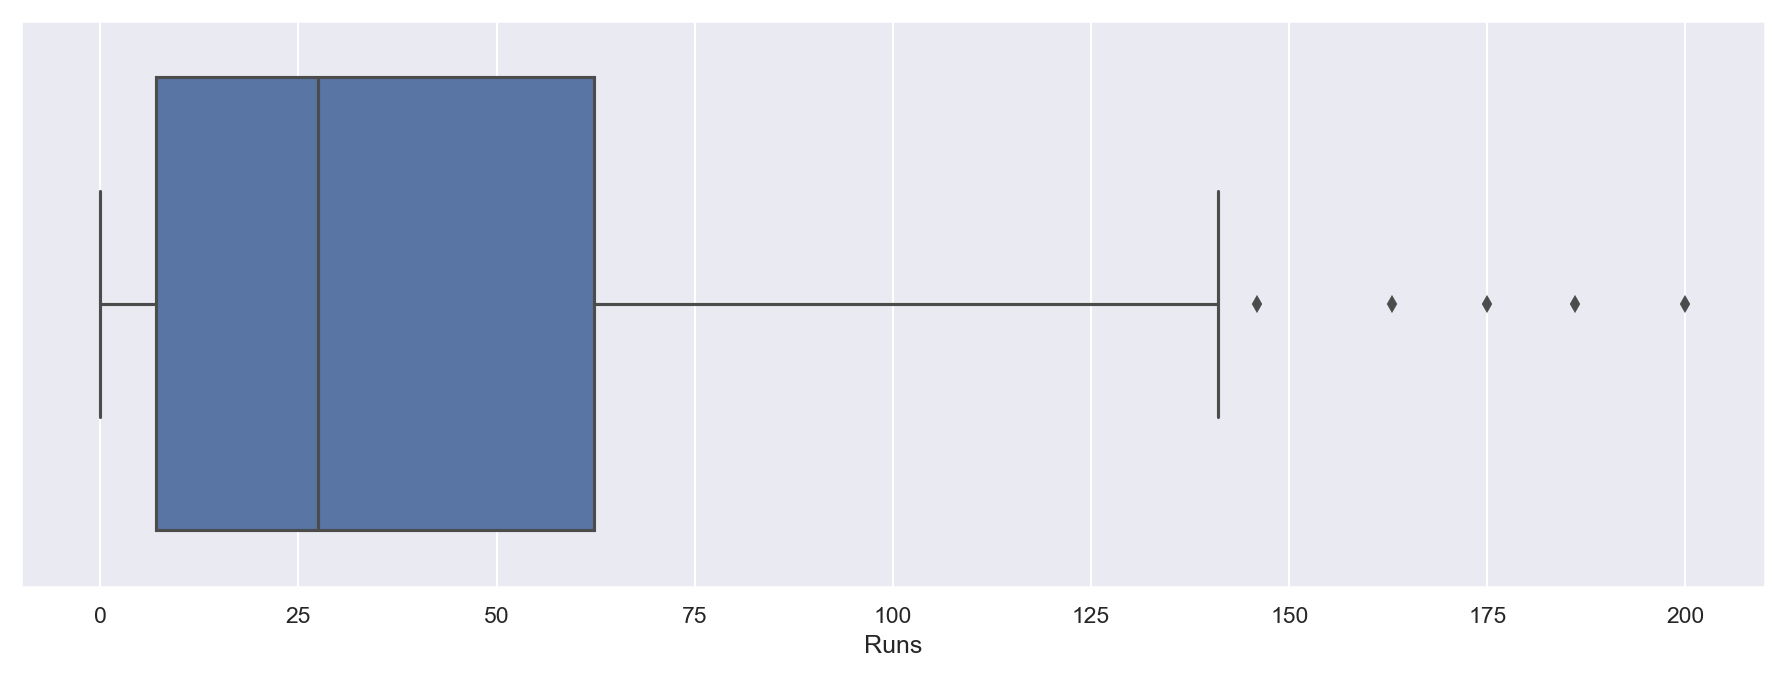

In [335]:
sns.boxplot(df['Runs']);


## Histrogram for runs

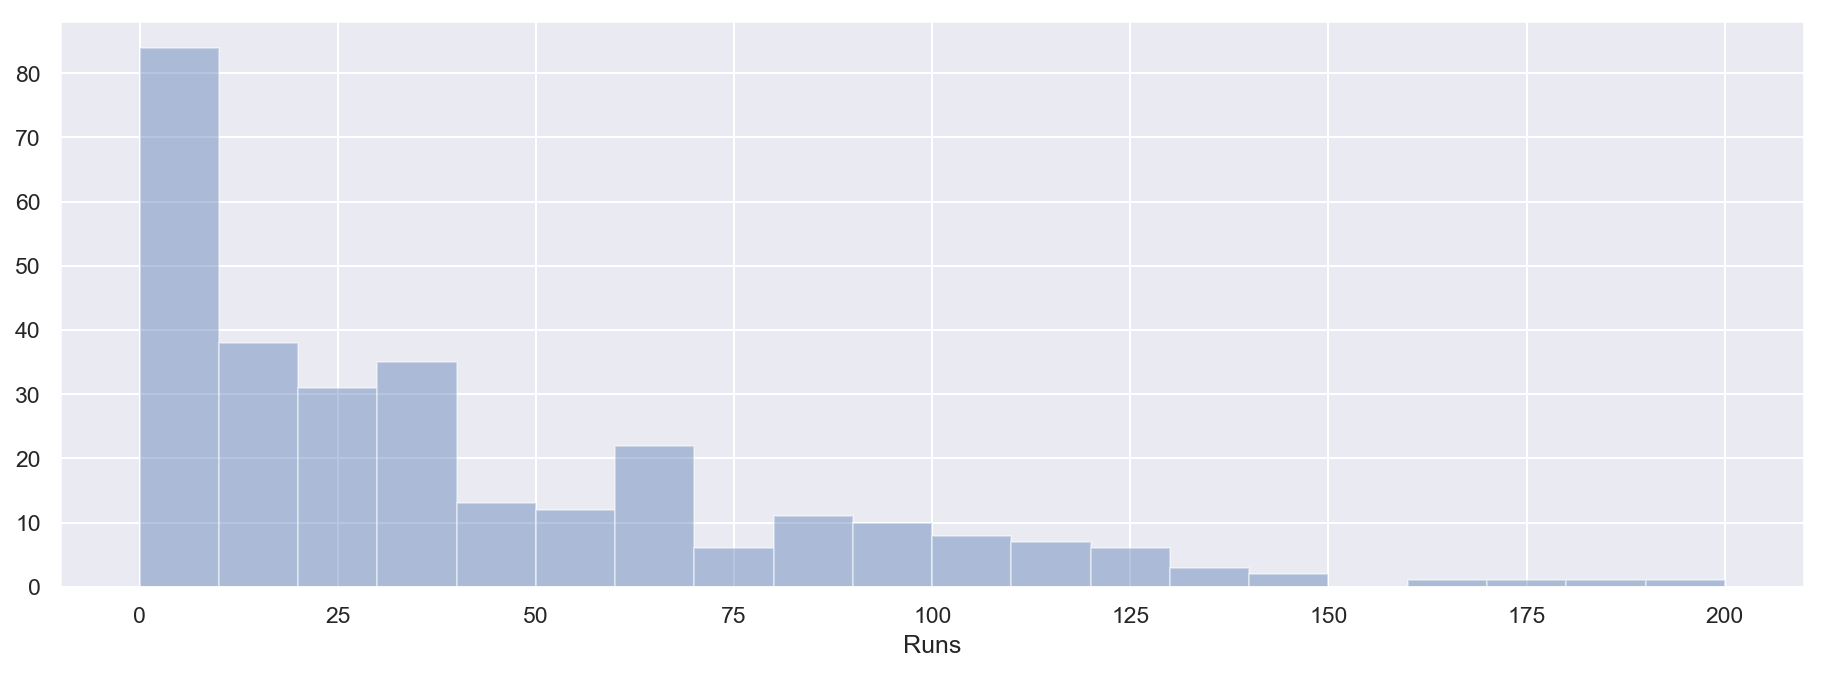

In [336]:
sns.distplot(df['Runs'], bins=20, kde=False);

#### It can be notices that the highest bars are around 2-3 runs.


## Histrogram for number of 4's

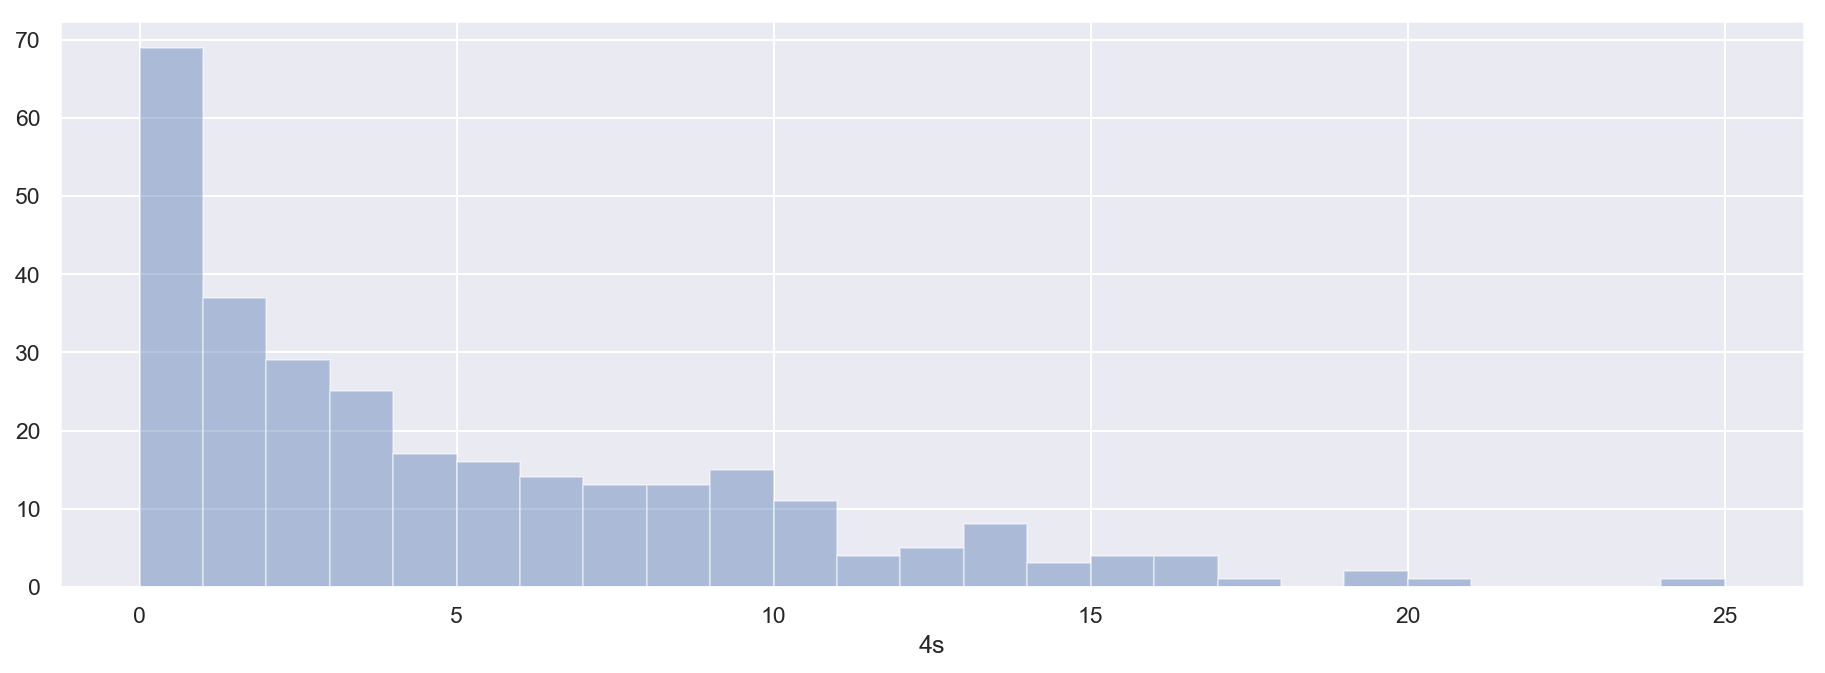

In [337]:
sns.distplot(df['4s'], kde=False, bins=25);

#### The bar chart clearly shows that he has hit 0 fours most often


## ODI century

### number of centuries vs opposition

In [338]:
odi_cen = df[df['Runs'] >= 100]
odi_cen['Opposition'].value_counts().reset_index( name='counts')

,index,counts
0,Australia,5
1,South Africa,5
2,Sri Lanka,5
3,New Zealand,5
4,Pakistan,3
5,West Indies,2
6,Zimbabwe,2
7,Kenya,2
8,Bangladesh,1


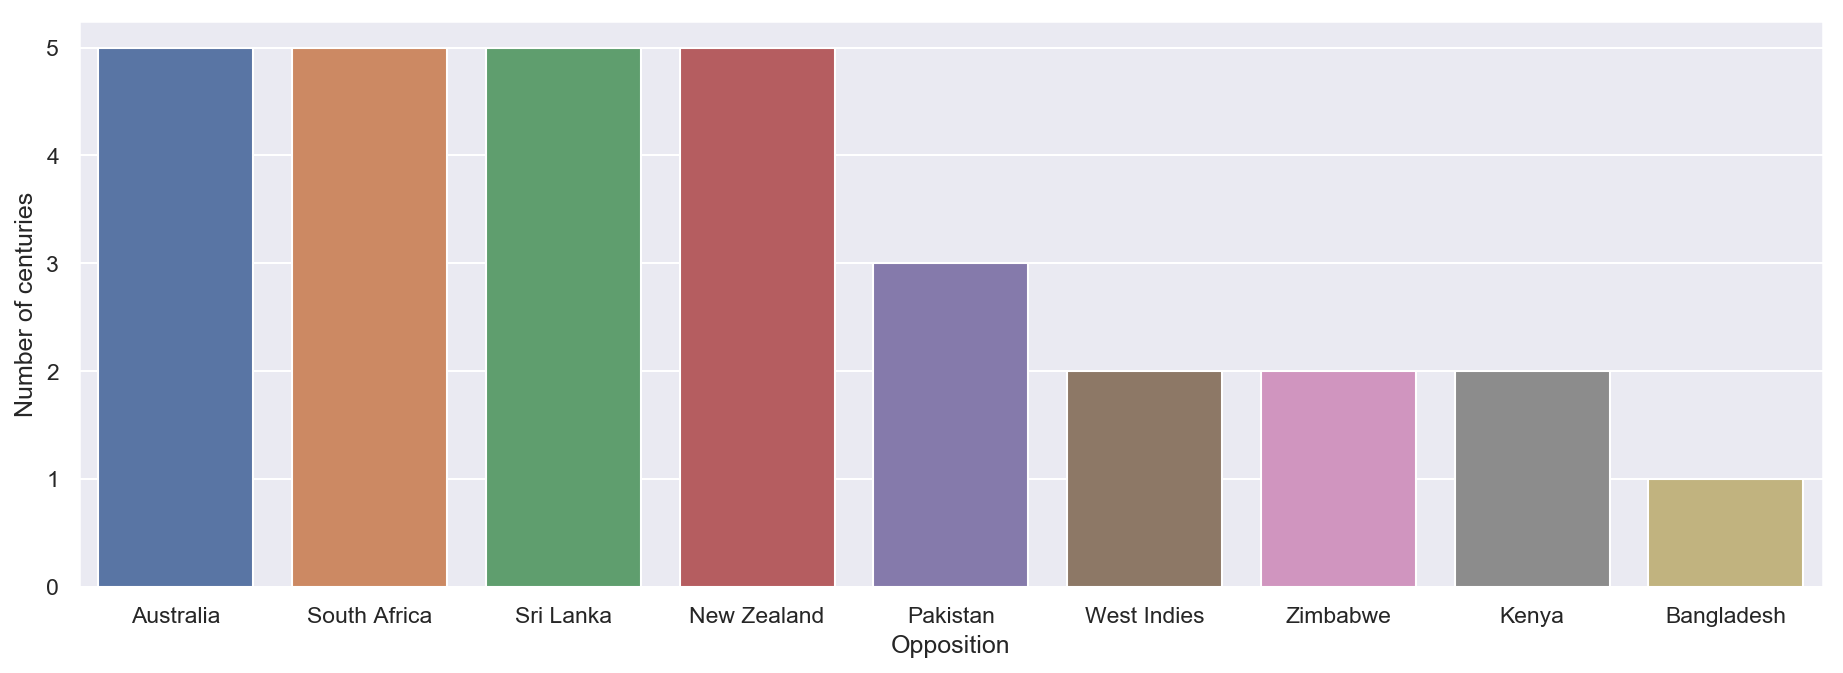

In [339]:
sns.set( rc={'figure.figsize':(15,5), 'figure.dpi':150})
sns.countplot(odi_cen['Opposition'], order=odi_cen['Opposition'].value_counts().index);
plt
plt.ylabel("Number of centuries");

In [340]:
#Number of centuries scored at grounds
odi_cen['Ground'].value_counts().reset_index( name='counts').head()

,index,counts
0,Vadodara,3
1,Hyderabad (Deccan),3
2,Colombo (RPS),3
3,Gwalior,2
4,Bengaluru,1


## Half centuries

In [341]:
odi_half_cen = df[(df['Runs'] >= 50) & (df['Runs'] < 100)]
odi_half_cen['Opposition'].value_counts().reset_index( name='counts')

,index,counts
0,Australia,14
1,Sri Lanka,13
2,England,8
3,West Indies,7
4,South Africa,5
5,New Zealand,5
6,Pakistan,4
7,Zimbabwe,3
8,U.A.E.,1
9,Bangladesh,1


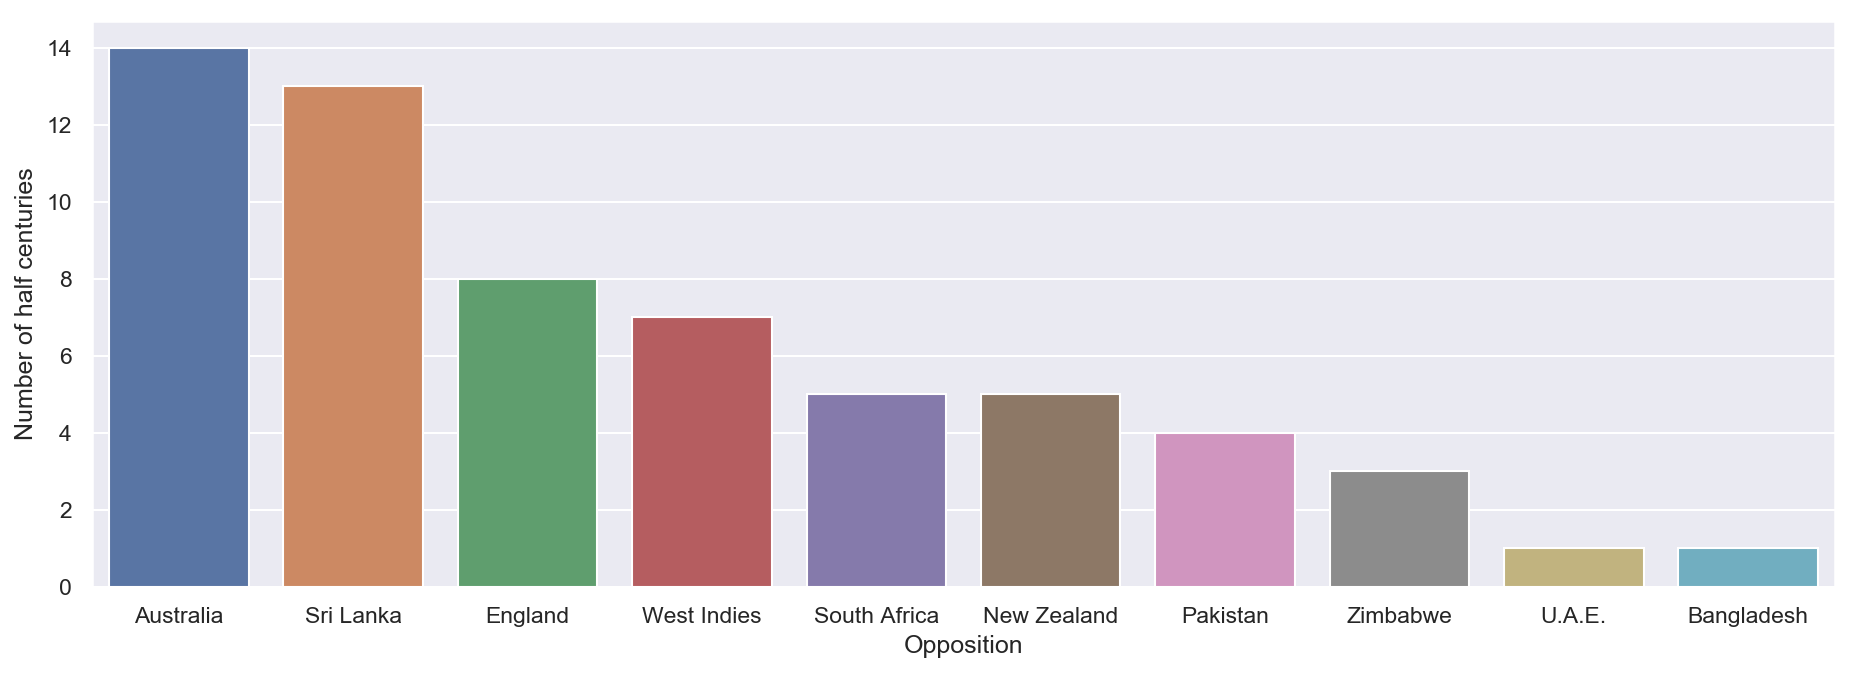

In [342]:
sns.set( rc={'figure.figsize':(15,5), 'figure.dpi':150})
sns.countplot(odi_half_cen['Opposition'], order=odi_half_cen['Opposition'].value_counts().index);
plt.ylabel("Number of half centuries");

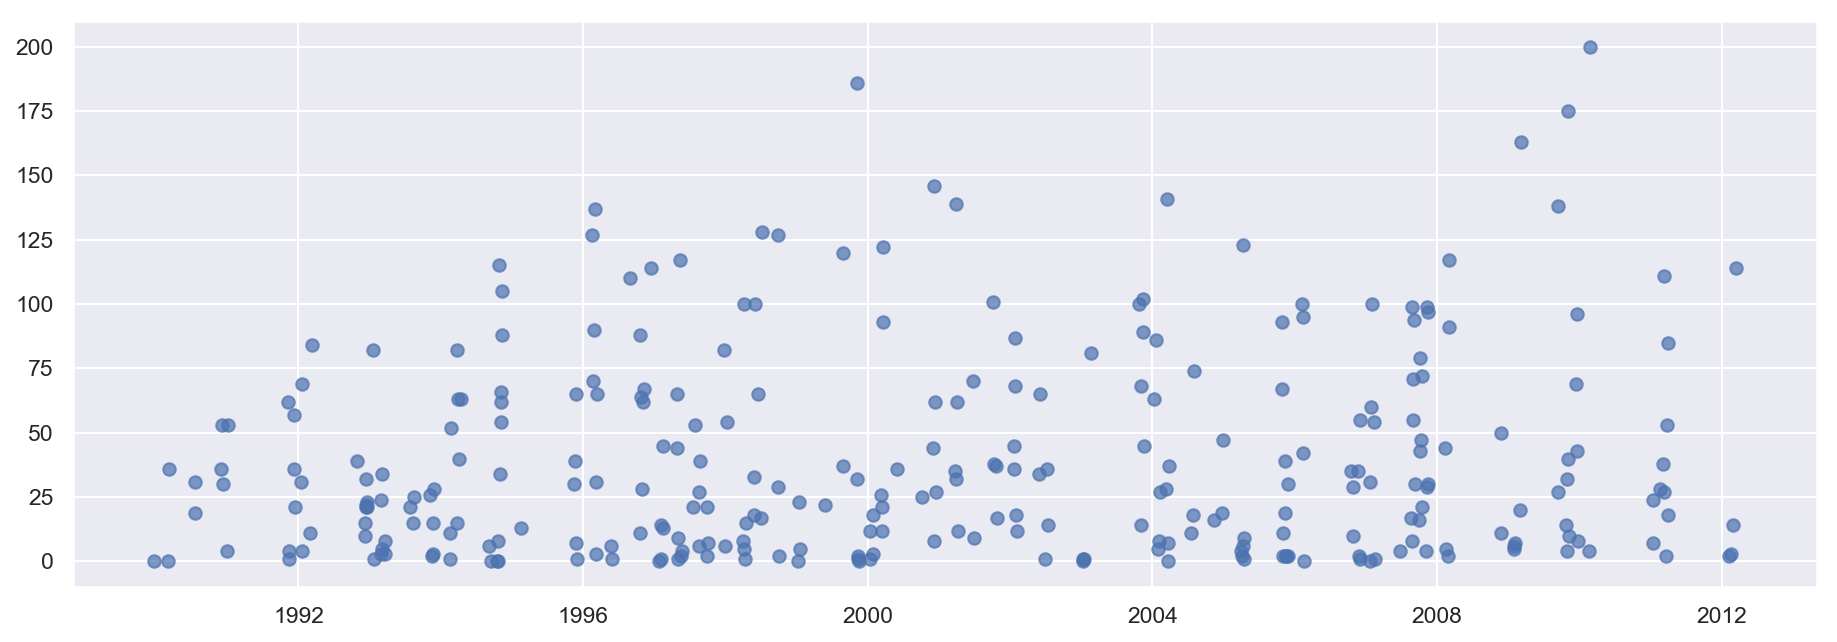

In [343]:
plt.scatter( df['Start Date'], df["Runs"], alpha=0.7);

In [344]:
# df['Opposition'].value_counts().plot.pie();

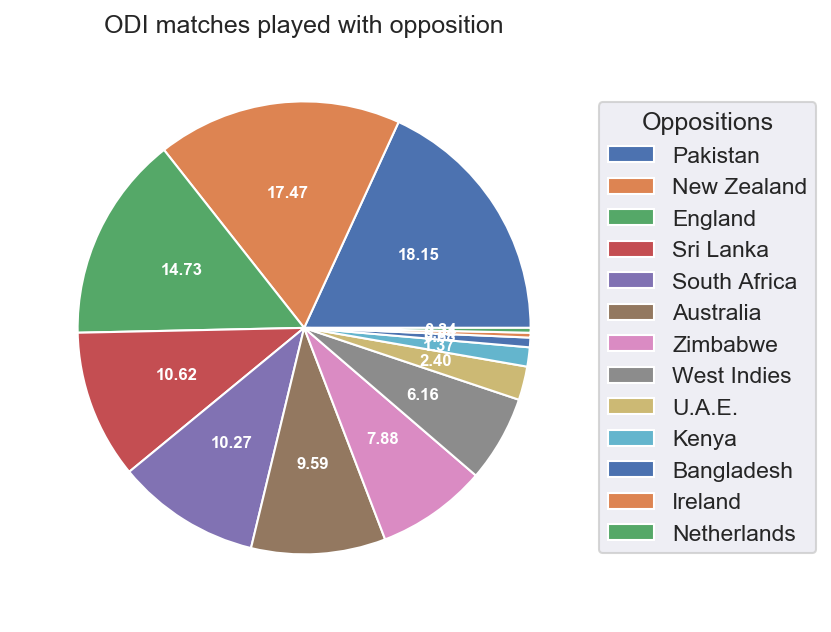

In [348]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie( df['Opposition'].value_counts(),autopct='%.2f', textprops=dict(color="w"))

ax.legend(wedges, df['Opposition'].unique(),
          title="Oppositions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("ODI matches played with opposition")

plt.show()